# Part I - (Dataset Exploration)
## by Putri Wulandari

## Introduction

In this data loan report, I examine the relationship between seven variables: stated monthly income, total prosper loans, total credit lines past 7 years, borrower rate, status home ownership, loan original amount, debt to income ratio and loan status. 
Overall, the goal of this report is to test hyphothesis of some considered important variables for lenders, if some variables worth noting in assessing a borrower's ability to repay a loan and mitigating their risk of loan default.



## Preliminary Wrangling


In [102]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from datetime import datetime
import matplotlib.dates as mdates
import statsmodels.api as sm
from dateutil.parser import parse
import matplotlib.dates as mdates


#instance label encoder
le = LabelEncoder()

%matplotlib inline

### Load prosperLoanData dataset and see the description of properties


In [103]:
df = pd.read_csv('prosperLoanData.csv')

### Structure of the dataset

This data set contains 113,937 loans with 81 variables on each loan.

### The main feature(s) of interest in the dataset

The main feature of interest in my dataset are including loan amount, borrower rate (or interest rate), occupation, borrower income, borrower employment status, borrower credit history, and the latest payment information.

### Some features in the dataset to investigation points of interest

These features may provide insights into a borrower's financial situation, creditworthiness, and ability to repay a loan, all of which may impact loan status.

## Univariate Exploration


In [132]:
# descriptive analysis of df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Data cleaning
### Drop missing values

In [133]:
# drop missing values > 30%
def removeNulls(dataframe, axis =1, percent=0.3):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows droppedt: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped: ",len(colnames))
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

# apply removeNulls
df_clean = removeNulls(df, axis= 1, percent = 0.3)

Number of Columns dropped:  12

Old dataset rows,columns (113937, 81) 
New dataset rows,columns (113937, 69)


### Columns to investigate


In [134]:
# select interesting columns to investigate
col = ['StatedMonthlyIncome','ProsperRating (numeric)','IsBorrowerHomeowner','LoanStatus'
       ,'BorrowerAPR','BorrowerRate','TotalCreditLinespast7years',
'Occupation','Term','DebtToIncomeRatio','AvailableBankcardCredit']
df_filter = df_clean.loc[:, col]

# create year from datetime 

def extract_year(data_string):
    date_object = pd.to_datetime(data_string)
    return date_object.year


df_filter['Year'] = df['ListingCreationDate'].apply(extract_year)

# Convert 'ListingCreationDate' to datetime using dateutil's parse
df_filter['date'] = df['ListingCreationDate'].apply(parse)

# Create 'Month' and 'Week' columns
df_filter['Month'] = df_filter['date'].dt.month
df_filter['Week'] =df_filter['date'].dt.isocalendar().week

# Create 'month_year' column
df_filter['month_year'] = df_filter['date'].dt.to_period('M')

# Check the result
print(df_filter[['date', 'Year', 'Month', 'Week', 'month_year']])

                          date  Year  Month  Week month_year
0      2007-08-26 19:09:29.263  2007      8    34    2007-08
1      2014-02-27 08:28:07.900  2014      2     9    2014-02
2      2007-01-05 15:00:47.090  2007      1     1    2007-01
3      2012-10-22 11:02:35.010  2012     10    43    2012-10
4      2013-09-14 18:38:39.097  2013      9    37    2013-09
...                        ...   ...    ...   ...        ...
113932 2013-04-14 05:55:02.663  2013      4    15    2013-04
113933 2011-11-03 20:42:55.333  2011     11    44    2011-11
113934 2013-12-13 05:49:12.703  2013     12    50    2013-12
113935 2011-11-14 13:18:26.597  2011     11    46    2011-11
113936 2014-01-15 09:27:37.657  2014      1     3    2014-01

[113937 rows x 5 columns]


### Encode Loan Status, IsBorrowerHOmeOwner

Since I wanted to use of home ownership status and status of a loean as input variables in my analysis, converting IsBorrowerHomeOwner and LoanStatus to numerical codes (e.g., 1 for "Defaulted", 2 for "Chargedoff", etc.) can make it easier to analyze the relationship between loan status, home ownership, and the rest other variables.

In [135]:
#encode Loan Status and save in new column:
def status(value):
    if value ==  "Chargedoff" or value == "Defaulted" :
        return "Loss"
    elif value == "Past Due (1-15 days)" or value == "Past Due (31-60 days)" or value == "Past Due (91-120 days)" or value == "Past Due (61-90 days)" or value == "Past Due (16-30 days)" or value == "Past Due (>120 days)":
        return "Due"
    elif value == "Current":
        return "Current"
    elif value == "Completed":
        return "Completed"
    
df_filter['StatusLoan'] = df_filter['LoanStatus'].map(status)
display(df_filter.head(5))

,StatedMonthlyIncome,ProsperRating (numeric),IsBorrowerHomeowner,LoanStatus,BorrowerAPR,BorrowerRate,TotalCreditLinespast7years,Occupation,Term,DebtToIncomeRatio,AvailableBankcardCredit,Year,date,Month,Week,month_year,StatusLoan
0,3083.333333,NaN,True,Completed,0.16516,0.1580,12.0,Other,36,0.17,1500.0,2007,2007-08-26 19:09:29.263,8,34,2007-08,Completed
1,6125.000000,6.0,False,Current,0.12016,0.0920,29.0,Professional,36,0.18,10266.0,2014,2014-02-27 08:28:07.900,2,9,2014-02,Current
2,2083.333333,NaN,False,Completed,0.28269,0.2750,3.0,Other,36,0.06,NaN,2007,2007-01-05 15:00:47.090,1,1,2007-01,Completed
3,2875.000000,6.0,True,Current,0.12528,0.0974,29.0,Skilled Labor,36,0.15,30754.0,2012,2012-10-22 11:02:35.010,10,43,2012-10,Current
4,9583.333333,3.0,True,Current,0.24614,0.2085,49.0,Executive,36,0.26,695.0,2013,2013-09-14 18:38:39.097,9,37,2013-09,Current


In [136]:
#encode Loan Status
columns = ['IsBorrowerHomeowner']
df_filter['IsBorrowerHomeowner'] = df_filter[columns].apply(lambda col: le.fit_transform(col))

display(df_filter.head(3))

,StatedMonthlyIncome,ProsperRating (numeric),IsBorrowerHomeowner,LoanStatus,BorrowerAPR,BorrowerRate,TotalCreditLinespast7years,Occupation,Term,DebtToIncomeRatio,AvailableBankcardCredit,Year,date,Month,Week,month_year,StatusLoan
0,3083.333333,NaN,1,Completed,0.16516,0.158,12.0,Other,36,0.17,1500.0,2007,2007-08-26 19:09:29.263,8,34,2007-08,Completed
1,6125.000000,6.0,0,Current,0.12016,0.092,29.0,Professional,36,0.18,10266.0,2014,2014-02-27 08:28:07.900,2,9,2014-02,Current
2,2083.333333,NaN,0,Completed,0.28269,0.275,3.0,Other,36,0.06,NaN,2007,2007-01-05 15:00:47.090,1,1,2007-01,Completed


## Visualizing individual datas

### 1. Borrower APR
I examine how BorrowerAPR distribution in the dataset represents the annual cost of the loan to the borrower, including both the interest rate and the fees. Analyzing the Borrower APR can provide valuable insights to the risk and profitabiliy of the loans, as well as the behavior of the borrowers. 
In this case, I handle outliers first by applying interquartile range (IQR) and visualize how Borrower APR is the distribution.

In [137]:
# handling outlier
# method to handle outlier with interquartile range (IQR)

def remove_outliers_iqr(df, column_name):
    """
    This function removes outliers from a given column in a pandas DataFrame using the interquartile range (IQR).
    The function returns a new DataFrame with the outliers removed.
    """
    # Find the first and third quartiles of the column
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    
    # Calculate the interquartile range
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remove the outliers from the DataFrame
    new_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return new_df




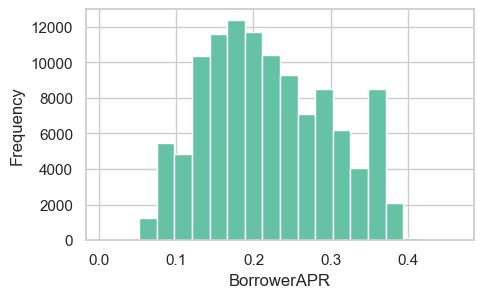

In [138]:
df_filter = remove_outliers_iqr(df_filter, 'BorrowerAPR')

# Create Histogram
plt.figure(figsize=(5,3))
plt.hist(df_filter['BorrowerAPR'], bins=20)

# Label
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')

# Show plot
plt.show()



The bulk of data appears to be centered somehwere around 0.2. This suggests that most common APRs for loan are around 20%. The APR ranges from near 0 to slightly above 0.4, indicating a fairly wide range of interest rates charged to borrowers. Additionally the distribution is somehwat multimodal (i.e, having multiple peaks). The most notable one is around 0.3 - 0.35. Moreover the distribution appears to just slightly skewed to the right due to a small tail extending towards higher APRs but the skewness is not very pronounced. 

### 2. Prosper Rating
Prosper Rating is important vairable because it captures the risk associated with each loan, which has implications for the interest rate, the likelihood of default, and the decision-making process of investors. With the ProsperRating (numeric) column, I examine the distribution of values using a histogram.
Since there are missing values in the ProsperRating (numeric) column, I handle them by imputing the missing values with the mean or median value

Missing values: 25.508081012035923 


<Axes: xlabel='ProsperRating (numeric)', ylabel='Count'>

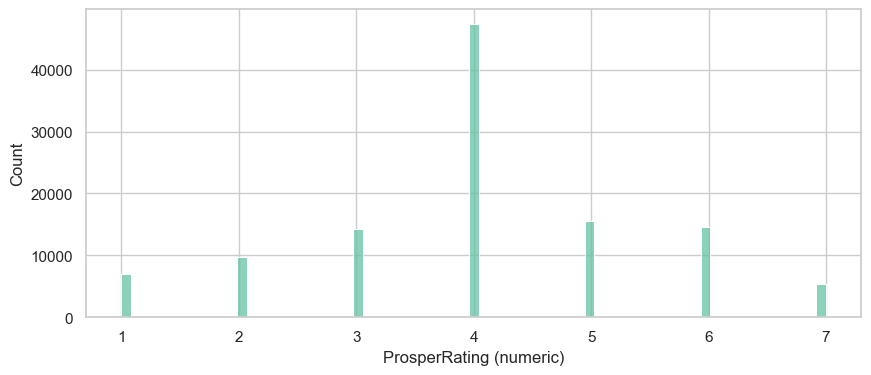

In [139]:
# Handling missing values
median_prosperRating = df_filter['ProsperRating (numeric)'].median()

# count missing values

missing_values = (df_filter['ProsperRating (numeric)'].isnull().sum() / df_filter.shape[0]) * 100
print(f"Missing values: {missing_values} ")

# Fill na values with median
df_filter['ProsperRating (numeric)'].fillna(median_prosperRating, inplace= True)

# visualize
sb.histplot(data=df_filter, x='ProsperRating (numeric)')


# show the plot
#plt.show()


The bulk of the data appears to be centered around 4, which is also the median value we used to fill in the missing data. The Prosper Rating (numeric) ranges from 1 to 7, indicating that the dataset includes loans from all rating categories. The shape of the distribution is somewhat multimodal, with noticeable peaks at each interger value from 1 to 7. The highest peak is at 4, which due to imputation of missing values to the median (25.5%). In conclusion, the distribution tells us that the loans in the dataset are fairly evenly spread across the different Prosper Rating categories, with the median risk loans (rating 4) constitute to the largest group. This partly influenced by our imputation method, where we filled missing values with median rating.

### 3. Borrower Rate
Borrower rate distribution
Borrower APR (Annual Percentage Rate) is the interest rate that a borrower pays on a loan. It includes not only the interest rate but also any other fees or charges associated with the loan, such as origination fees or late payment fees. The borrower APR is expressed as a percentage of the loan amount and represents the total cost of the loan over the course of one year. It is used as a way to compare the cost of different loan options.
In this case I handle the outliers with applying the interquartile range and plot the boxplot to see the distribution of Borrower Rate.

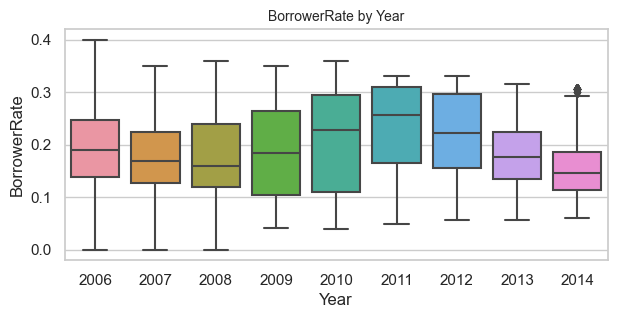

In [140]:
# boxplot
df_filter = remove_outliers_iqr(df_filter, 'BorrowerRate')

plt.figure(figsize=(7, 3))
sb.boxplot(x=df_filter['Year'], y=df_filter['BorrowerRate'])
plt.title('BorrowerRate by Year', fontsize=10)
plt.show()

From the boxplot of BorrowerRate, we can see that the median has been varied from year to year. The distribution of the rates each year has been quite diverse, as shown by different box sizes and whisker lengths. 

### 4. Stated Monthly Income
The Stated Monthly Income is an important factor in loan analysis. It is a key indicator of the ability of the borrower to pay back the loan, can influence the amount of money they are able to borrow, affect interest rate, and determine risk assessment. Handling the outliers with interquartile range is impletemented to clean the data before visualizing the distribution of Stated Monthly Income.

<Axes: >

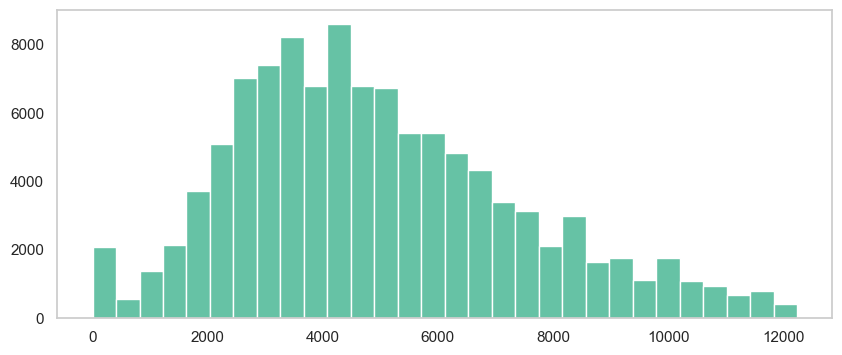

In [141]:
df_filter = remove_outliers_iqr(df_filter, 'StatedMonthlyIncome')
df_filter['StatedMonthlyIncome'].hist(bins=30,grid = False)

This histogram shows the distribution of stated monthly incomes in the dataset, after outliers have been removed. The distribution is right-skewed, indicating that most borrowers have lower monthly incomes, with a smaller number of borrowers having higher incomes. The highest frequency is for borrowers with a monthly income around $5000.

### 5. Occupation
Since value "professional" and "other" don't tell meaningful data, I drop this and recreate the histogram to see the distribution of the occupations of the borrowers.


C:\Users\w83602\AppData\Local\Temp\ipykernel_6640\4027715444.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation = 90, fontsize=8)


[Text(0, 0, 'Computer Programmer'),
 Text(1, 0, 'Teacher'),
 Text(2, 0, 'Administrative Assistant'),
 Text(3, 0, 'Analyst'),
 Text(4, 0, 'Clerical'),
 Text(5, 0, 'Sales - Commission'),
 Text(6, 0, 'Executive'),
 Text(7, 0, 'Accountant/CPA'),
 Text(8, 0, 'Sales - Retail'),
 Text(9, 0, 'Skilled Labor'),
 Text(10, 0, 'Retail Management'),
 Text(11, 0, 'Nurse (RN)'),
 Text(12, 0, 'Construction'),
 Text(13, 0, 'Truck Driver'),
 Text(14, 0, 'Laborer'),
 Text(15, 0, 'Police Officer/Correction Officer'),
 Text(16, 0, 'Civil Service'),
 Text(17, 0, 'Engineer - Mechanical'),
 Text(18, 0, 'Military Enlisted'),
 Text(19, 0, 'Food Service Management'),
 Text(20, 0, 'Food Service'),
 Text(21, 0, 'Medical Technician'),
 Text(22, 0, 'Engineer - Electrical'),
 Text(23, 0, 'Tradesman - Mechanic'),
 Text(24, 0, 'Social Worker'),
 Text(25, 0, 'Attorney'),
 Text(26, 0, 'Postal Service'),
 Text(27, 0, 'Professor'),
 Text(28, 0, "Nurse's Aide"),
 Text(29, 0, 'Realtor'),
 Text(30, 0, 'Nurse (LPN)'),
 Text(31,

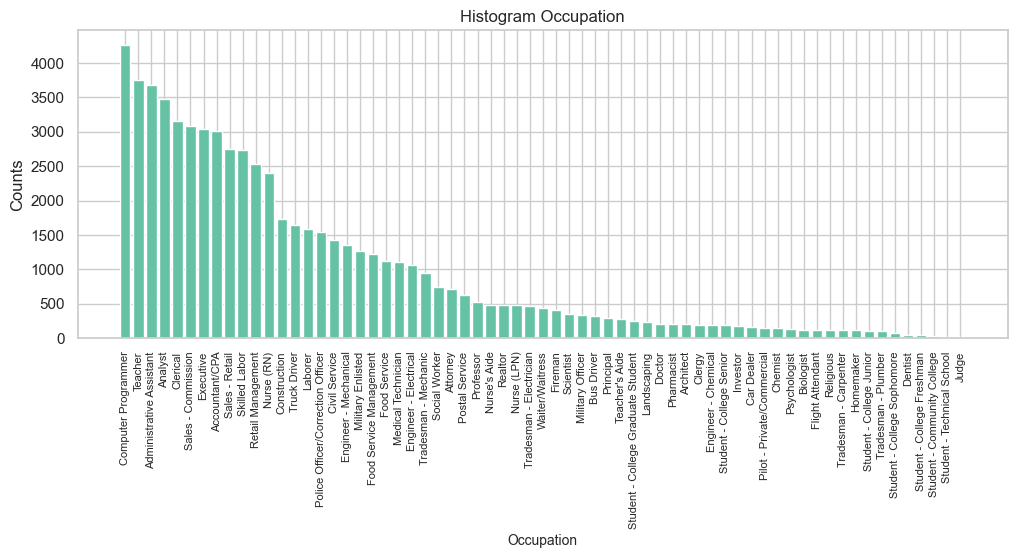

In [142]:
# Create a new DataFrame that excludes the values 'Professional' and 'Other'
df_filter = df_filter.loc[~df_filter['Occupation'].isin(['Professional', 'Other'])]

counts = df_filter['Occupation'].value_counts()

# Set the size of the figue
fig, ax = plt.subplots(figsize=(12,4))

# Plot the counts as a bar chart
ax.bar(counts.index, counts)

# Add labels and title
ax.set_xlabel('Occupation', fontsize=10)
ax.set_ylabel('Counts')
ax.set_title('Histogram Occupation')

# Rotate the x-axis label
ax.set_xticklabels(counts.index, rotation = 90, fontsize=8)

This histogram shows the distribution of varied borrowers occupations, excluding "Others" and "Professional". We can see from the histogram that the most common borrowers are Computer Programmer and Executive with the least common of borrowers are Judge and Student. This visualisation may be useful in understandig the patterns related to loan outcomes. 

### 6. Debt to Income Ratio
Since value professional and other don't tell meaningful data, I drop this and recreate the histogram

DebtToIncomeRatio
0.18000    2418
0.22000    2229
0.17000    2123
0.20000    2117
0.14000    2061
           ... 
0.19496       1
0.08140       1
0.14543       1
0.19877       1
0.31080       1
Name: count, Length: 810, dtype: int64


Text(0.5, 0, 'Debt to Income Ratio')

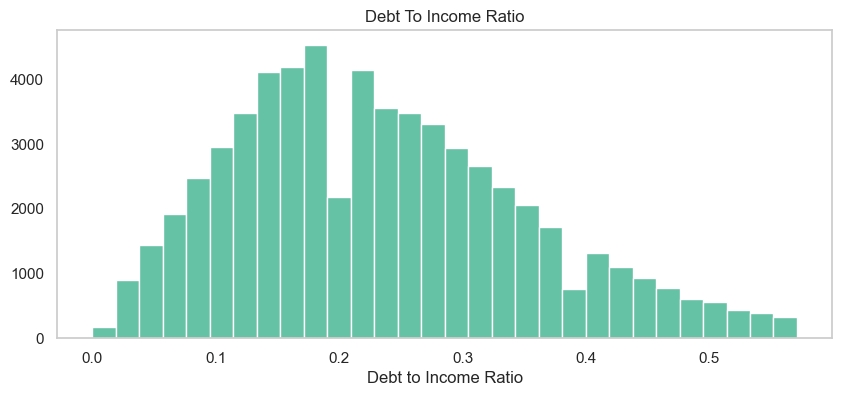

In [143]:
df_filter = remove_outliers_iqr(df_filter, 'DebtToIncomeRatio')

# Handling missing values
debtToIncomeRatio = df_filter['DebtToIncomeRatio'].median()


# Fill na values with median
df_filter['DebtToIncomeRatio'].fillna(debtToIncomeRatio, inplace= True)
pd.reset_option('display.max_rows')
np.set_printoptions(threshold=1000)

print(df_filter['DebtToIncomeRatio'].value_counts())

# visualize

df_filter['DebtToIncomeRatio'].hist(bins=30,grid = False)

# set plot title and x-axis label
plt.title('Debt To Income Ratio')
plt.xlabel('Debt to Income Ratio')



The histogram of Debt to Income Ratio shows that the data is skewed to the right, after outliers have been removed and replacing the null values with the median, indicating that the most of borrowers have not had more than 0.25 debt to income ratio. The highest frequency is around 0.25. However the distribution also shows that there is considerate number of borrowers with higher Debt to Incom Ratios up to 0.52. These borrowers maybe at a higher risk of default.

### 7. Loan status
Loan Status is an important data set to be analyse due to consideration of if the borrowers have defaulted their loan, assess the overall risk of the loan portfolio, help to identify the trends or patterns in loan performance. 
To analyse loan status, intuitively I groupped the categories into meaningful group to address the questions that are more straight forward. For example, 'Loss' indicates the loans where money has been lost because the borrower has defaulted or the debt has been charged off.'Due' represents the loans which are past due and where there is a risk of default.
'Current' represents the loans which are ongoing and where the borrower is up to date with their payments.
'Completed' represents the loans which have been fully paid off. Then plot them with the barplot.

StatusLoan
Current      50.098878
Completed    33.644557
Loss         14.567529
Due           1.689036
Name: count, dtype: float64


<Axes: xlabel='StatusLoan', ylabel='count'>

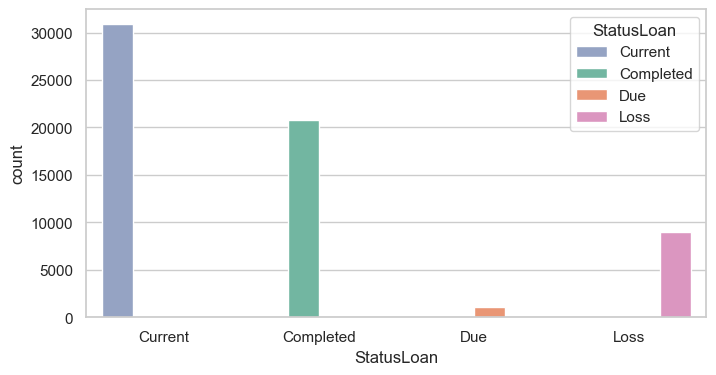

In [144]:
# simplify loan status
def status(value):
    if value ==  "Chargedoff" or value == "Defaulted" :
        return "Loss"
    elif value == "Past Due (1-15 days)" or value == "Past Due (31-60 days)" or value == "Past Due (91-120 days)" or value == "Past Due (61-90 days)" or value == "Past Due (16-30 days)" or value == "Past Due (>120 days)":
        return "Due"
    elif value == "Current":
        return "Current"
    elif value == "Completed":
        return "Completed"

# map loan status in status loan     
df_filter['StatusLoan'] = df_filter['LoanStatus'].map(status)

count = df_filter['StatusLoan'].value_counts()

proportions = count / count.sum() * 100

print(proportions)

plt.figure(figsize=(8,4))

# define order of categories
order = ["Completed","Due","Current","Loss"]

# set the 'rocket' palette with the desired order
colors = sb.color_palette("Set2", len(order))
custom_palette = dict(zip(order, colors))

sb.countplot(x='StatusLoan', data =df_filter, hue = 'StatusLoan', palette=custom_palette)


After the categories of Loan Status groupped, the largest categories of "Current" is the largest category amongst all, with 32439 (49.46%). This indicate that most payments are being made as agreed upon the loan agreement and where borrower is up to date with their payments. The "Completed", 21880 (33.68%), category represent all the loan that have been fully paid off as the second largest numbers. The "Loss" is reported at 9554 (15.14%), where the lender has determined that they will likely not recover the money back. The smallest in the group is "Due" which represents that the loan are past due, with 1096 (1.72%).

## Bivariate Exploration


### 1. Home ownership and the status loan
Home ownership is often seen as a significant indicator of financial stability. By comparing home ownership to loan status, we can gain insights into whether or not owning a home influences the likelihood of a loan being paid off, being current, or going into a loss status.

StatusLoan  IsBorrowerHomeowner
Completed   0                      10853
            1                       9903
Current     1                      16439
            0                      14468
Due         0                        523
            1                        519
Loss        0                       5101
            1                       3886
Name: count, dtype: int64


C:\Users\w83602\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


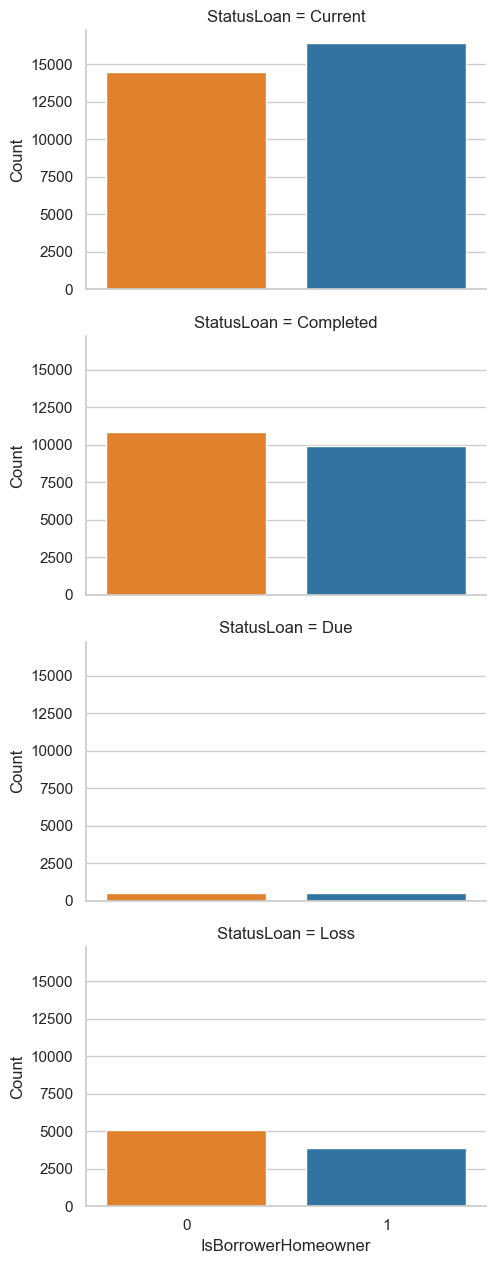

In [145]:
# does home ownership contributes the the status loan?
my_palette = sb.color_palette("tab10", 2)[::-1]

counts_homeOwner = df_filter.groupby('StatusLoan')['IsBorrowerHomeowner'].value_counts()
print(counts_homeOwner)

grid = sb.FacetGrid(df_filter,col='StatusLoan', height=3.2, aspect=1.6, col_wrap=1)
grid.map(sb.countplot, 'IsBorrowerHomeowner', palette=my_palette)
grid.set_axis_labels('IsBorrowerHomeowner', 'Count')

This histogram provides a breakdown of loan statuses ('Completed', 'Current', 'Due', and 'Loss') by home ownership (represented by 0 for 'No' and 1 for 'Yes'). Completed Loans: Out of all the completed loans, 11,659 were borrowed by non-homeowners and 10,273 by homeowners. This suggests that both homeowners and non-homeowners have a good track record of completing their loans.
Current Loans: For the current loans, 17,077 are with homeowners and 15,723 with non-homeowners. This indicates that a slightly higher number of homeowners have loans that are currently active and in good standing.
Due Loans: Among the loans that are due, 587 belong to non-homeowners and 544 to homeowners. The numbers are relatively close, suggesting that both homeowners and non-homeowners have similar rates of overdue loans.
Loss Loans: The loans marked as 'Loss' are those where the lender has marked it off as a loss, indicating that the borrower has defaulted. Here, non-homeowners have a higher count (5,555) compared to homeowners (4,236). This might suggest that non-homeowners are slightly more likely to default on their loans.

### 2. TotalCreditLinespast7years vs Status Loan
Total Credit Lines in Past 7 Years and Loan Status: The number of credit lines that a person has had in the past 7 years can tell us about their borrowing behavior. A large number of credit lines might indicate a higher risk of over-borrowing and defaulting on loans. Conversely, a smaller number of credit lines might indicate a more cautious approach to borrowing. By examining this factor in conjunction with loan status, we can explore these potential relationships further. After handling the outliner, then the plot the spread of the data with boxplot.

StatusLoan  TotalCreditLinespast7years
Completed   18.0                          660
            20.0                          628
            21.0                          626
            15.0                          618
            22.0                          613
                                         ... 
Loss        55.0                           29
            57.0                           29
            54.0                           29
            56.0                           24
            59.0                           14
Name: count, Length: 232, dtype: int64


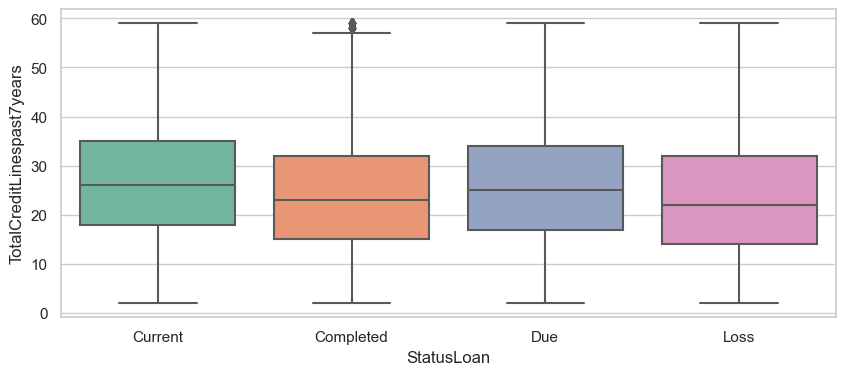

In [146]:
df_filter = remove_outliers_iqr(df_filter, 'TotalCreditLinespast7years')

counts_credit = df_filter.groupby('StatusLoan')['TotalCreditLinespast7years'].value_counts()
print(counts_credit)
sb.boxplot(x="StatusLoan", y="TotalCreditLinespast7years", data=df_filter)
sb.set(rc={'figure.figsize':(10,4)})
sb.set_style("whitegrid")
sb.set_palette("Set2")

Looking at the medians of different groups between "Current", "Completed", "Due", and "Loss" from the boxplot, there is no significant difference since the central tendency fall inside the range of each other's boxes after removing the outliers. 

### 3. Prosper Rating and Status Loan

The Prosper rating is a custom risk score built using historical Prosper data. It is intended to give a quick summary of the estimated risk of a particular loan. By comparing this with the loan status, we can see the relationship between the two data sets.

C:\Users\w83602\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


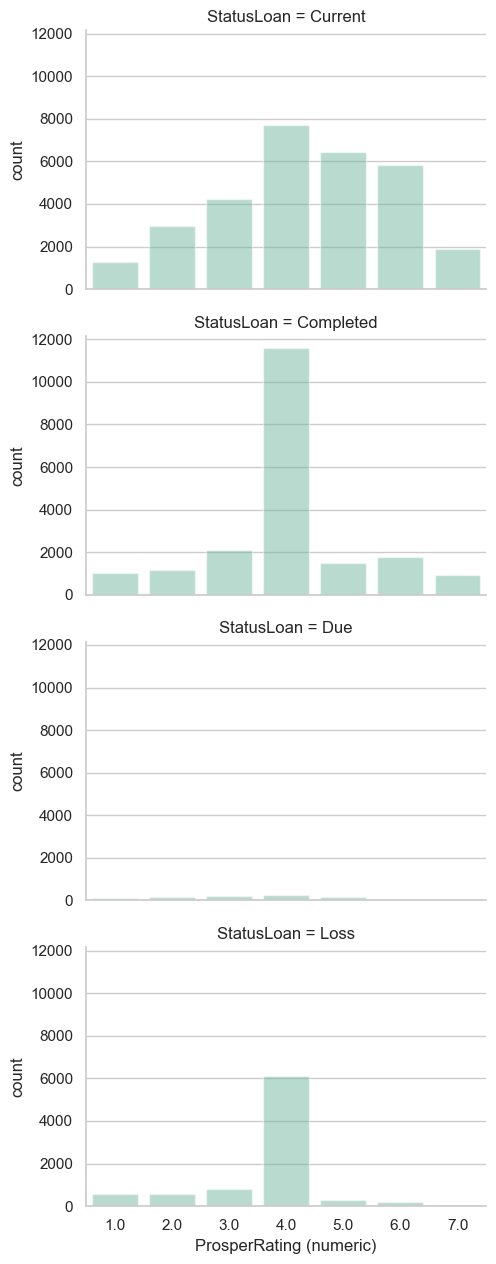

In [147]:
grid = sb.FacetGrid(df_filter,col='StatusLoan', height=3.2, aspect=1.6, col_wrap=1, palette ='tab10')
grid.map(sb.countplot,'ProsperRating (numeric)', alpha=0.5)


Since the major borrowers have ProsperRating of 4, it is no surprise that it aligns with the barcharts between each status loan where the ProsperRating 4 has the largest number. A ProsperRating of 4 is a moderate level of creditworthiness, indicating that most borrowers on the platform are moderately creditworthy. 

## Multivariate Exploration

Since Status Loans is the important outcome variable to the loan performance and borrower's repayment behavior, seeing how the status loans distributed in Stated Monthly Income, Total Credit Lines past 7 years, and Borrower rate might show holistic understanding of the factors that might influence loan performance and risk

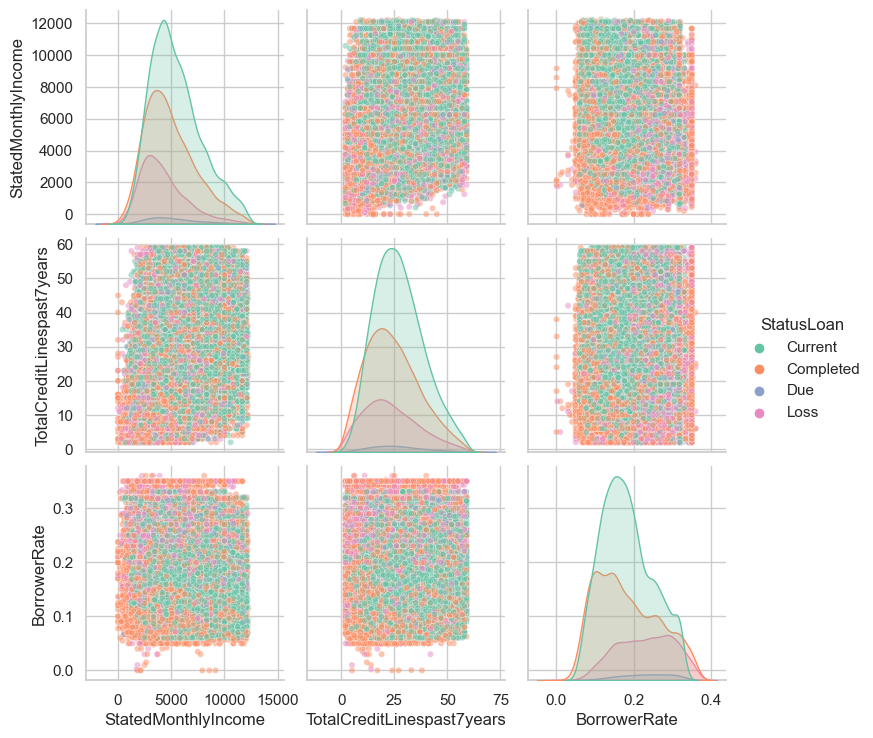

In [148]:
cols = ['StatedMonthlyIncome', 'TotalCreditLinespast7years','BorrowerRate',
       'StatusLoan']

# create a pairplot with scatterplot for each combination of columns
sb.pairplot(data=df_filter[cols], hue='StatusLoan',  diag_kind='kde', diag_kws={'bw_adjust': 1.5}, plot_kws={'alpha': 0.5, 's': 20})

### From this plot, we can observe the following:

1. Stated Monthly Income vs. Total Credit Lines in past 7 years: This plot shows a similar distribution as our earlier scatter plots. There's no clear pattern or relationship between these two variables.

2. Stated Monthly Income vs. Borrower Rate: Borrower rates seem to be spread across all income levels, with no clear pattern. This suggests that the borrower rate might be determined by other factors not included in this plot.

3. Total Credit Lines in past 7 years vs. Borrower Rate: Similarly, borrower rates seem to be spread across all levels of total credit lines, with no clear pattern.

The distribution plots on the diagonal show that most loans are either current or completed, with a smaller number of loans being defaulted or due, similar to our earlier findings.

## Conclusions
In our analysis of Prosper's loan data, we conducted both univariate and bivariate explorations on several variables including borrower APR, Prosper rating, borrower rate, total credit lines in the past 7 years, stated monthly income, occupation, debt to income ratio, and loan status.

Univariate findings revealed that the majority of loans were given to borrowers with a Prosper rating of 4, reflecting a moderate level of creditworthiness. The most common APR for loans was around 20%, and borrower rates varied widely over the years. The typical stated monthly income was around $5000, and the debt to income ratio for most borrowers did not exceed 0.25, indicating a potential default risk for those with higher ratios.

In the bivariate exploration, we found that homeownership seemed to influence loan outcomes. Both homeowners and non-homeowners generally completed their loans, but non-homeowners were slightly more likely to default. Furthermore, the majority of borrowers with a Prosper rating of 4 had current or completed loans, suggesting a link between creditworthiness and loan status. However, the Prosper rating did not greatly differ across different loan statuses, indicating that it might not solely predict the loan status.

Finally, our multivariate analysis did not reveal any clear relationships between loan status and the other variables (stated monthly income and total credit lines in the past 7 years). This suggests that borrower rate might be influenced by factors not included in this study.

In conclusion, this exploratory analysis has provided useful insights into Prosper's loan data. The results could assist both borrowers and lenders in decision-making. However, as our findings are primarily descriptive, further statistical analysis would be required to establish causal relationships.
